# 기술적 통계 (Descriptive Statistcs)

데이터를 기술적 통계적 방법을 통해 요약해 봄으로써 데이터를 이해하는데 도움을 받을 수 있습니다.


In [1]:
import quilt

quilt.install("uciml/iris", force=True)

Fragments already downloaded


In [2]:
from quilt.data.uciml import iris

df_iris = iris.tables.iris()

## 단변량 분석(Univariate Analysis)

각각의 변수를 통계적 방법으로 분석하여 변수안의 데이터가 어떤 분포를 가지고 있는지 확인할 수 있습니다.

**연속형 변수(Continuous Variable)**
* 최대(Max), 최소(Min), 중간(Median), 평균(Mean) 값을 통해 데이터의 중심화 경향(Central Tendency)를 조사해봅니다.
* 분산(Variance), 표준 편차(Standard Deviation), 범위(Range), 사분위수(Quartile), 외도(Skewness), 첨도(kurtosis)를 통해 데이터의 분포를 볼수 있습니다.


**범주형 변수(Categorical Variable)**
* 변수안의 데이터가 몇개의 범주를 가지는지 그리고 각 범주별 비율을 도수분포표(Frequency Table)을 통해 데이터 분포를 확인 합니다.

In [3]:
import pandas as pd 

df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


좀 더 확인하기 쉽도록 boxplot, histogram을 통해 이를 시각화 해볼 수 있습니다.

In [4]:
# select_dtypes: 원하는 타입의 데이터 선택
df_iris.select_dtypes(include = ['float64', 'int64']).boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78f00d0a90>,
      dtype=object)

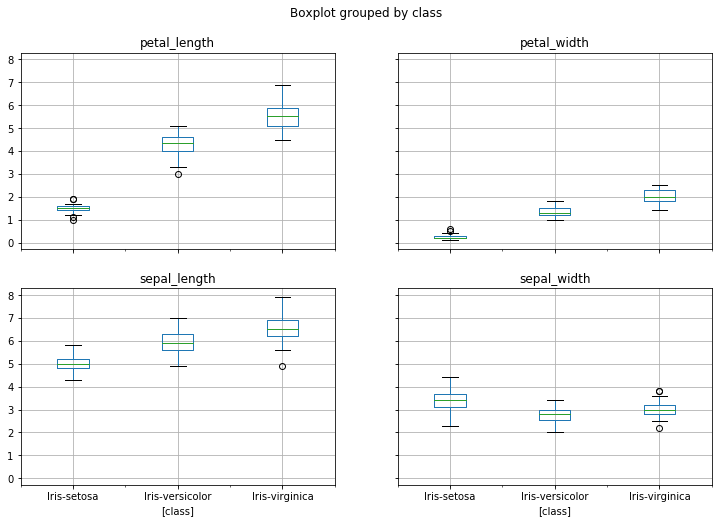

In [5]:
df_iris.boxplot(by='class', figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78e1cef9e8>,
      dtype=object)

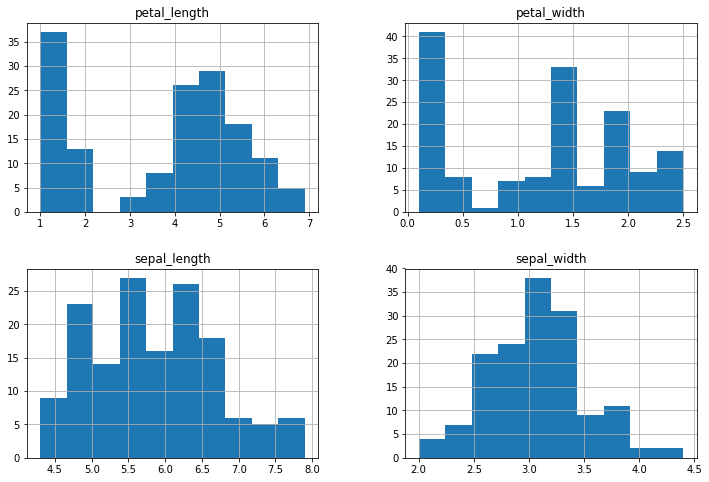

In [6]:
df_iris.hist(figsize=(12, 8))

범주형 데이터에 대해서 도수분포표(Frequency Table)를 작성해 봅니다.

In [7]:
# 범주형 데이터 카운트
df_iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [8]:
# 범주형 데이터 비율
df_iris['class'].value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: class, dtype: float64

## 이변량 분석(Bi-variate Analysis)

**두개의 연속형 변수(Continuous Variable)**

데이터의 두 컬럼간의 상관관계를 구해봄으로써, 두개의 컬럼이 서로 어떤 방향성을 가지는지 확인해봅니다. 

* 양의 상관관계 (Positive Correlation)
  * 상관 관계 결과가 양수 값으로, 두 데이터가 서로 같은 방향성을 가짐 (예, 하나의 데이터가 증가할때, 다른 데이터도 증가)
* 음의 상관관계 (Negative Correlation)
  * 상관 관계 결과가 음수 값으로, 두 데이터가 서로 다른 방향성을 가짐 (예, 하나의 데이터가 증가할때, 다른 데이터는 감소)
* 무 상관관계 (Neutral Correlation)
  * 상관 관계 결과가 0 값으로, 두 데이터의 방향성이 규칙성을 가지지 않음

상관 관계는 두 데이터 간 선형적 증감의 경향성만을 나타내며, 하나의 데이터가 다른 데이터에 영향을 주는지에 대한 인과 관계는 알수 없습니다. 

상관 관계 분석은 인과 관계 분석시에 독립변수(independent variable, X)의 차원을 줄이는데 응용이 가능합니다, 예를 들어 인과 관계 분석 시에 상관 관계 분석을 통해 독립변수와 종속변수(dependent variable, Y)간에 상관 관계가 존재하지 않는 다면 해당 변수는 분석에 도움이 되지 않을 것이므로 제거할 수 있습니다.

데이터의 상관 관계를 구해보고, 분석이 용이하도록 heatmap 으로 시각화해봅니다. 

In [9]:
df_iris_corr = df_iris.drop('class', axis=1).corr()
df_iris_corr.head()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


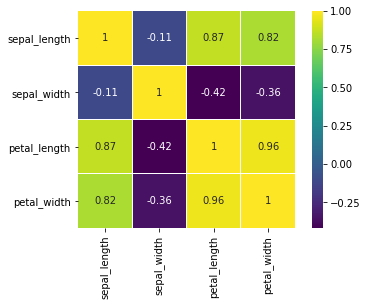

In [10]:
import seaborn as sns

# cmap: color map
# annot=True, square=True: X 축 라벨 세로방향 출력
# linewidths: 셀에 간격 주기
sns.heatmap(df_iris_corr, cmap='viridis', linewidths=0.1, annot=True, square=True)

**두개의 범주형 변수(Categorical Variable)**

도수 분포표(Frequncy Table)


In [11]:
import quilt
from quilt.data.agoico import kaggle_titanic

quilt.install('agoico/kaggle_titanic', force=True)
df_titanic = kaggle_titanic.train()

Fragments already downloaded


In [12]:
df_titanic_ct = pd.crosstab(index=df_titanic["Survived"], columns=df_titanic["Pclass"], margins=True)
df_titanic_ct.columns = ["1st", "2nd", "3rd", "RowTotal"]
df_titanic_ct.index = ["Died", "Survived", "ColTotal"]
df_titanic_ct.head()

,1st,2nd,3rd,RowTotal
Died,80,97,372,549
Survived,136,87,119,342
ColTotal,216,184,491,891


In [13]:
df_titanic_ct = df_titanic_ct/df_titanic_ct.loc['ColTotal', 'RowTotal']
df_titanic_ct.head()

,1st,2nd,3rd,RowTotal
Died,0.089787,0.108866,0.417508,0.616162
Survived,0.152637,0.097643,0.133558,0.383838
ColTotal,0.242424,0.206510,0.551066,1.000000


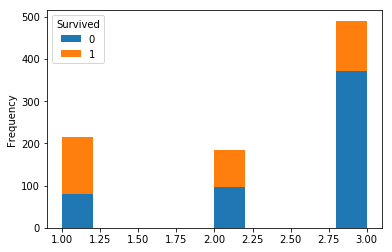

In [14]:
df_titanic.pivot(columns='Survived')["Pclass"].plot(kind = 'hist', stacked=True)

**Chi-Square Test**

카이제곱 검정을 통해 독립변수와 종속변수간에 연관성을 체크합니다. 이 또한 독립변수와 종속변수가 독립이라면 해당 독립변수는 분석에서 제외 시켜 차원을 축소할 수 있게 됩니다.

카이제곱 검정에서는 p-value > 0.05 이면 두 변수가 독립입니다. 

In [15]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(df_titanic[["Survived", "Pclass"]])

print("Chi-Square\n chi2={}\n p_value={}\n dof={}\n expected\n{}".format(chi2, p_value, dof, expected))

Chi-Square
 chi2=638.065272411705
 p_value=0.9999999999837883
 dof=890
 expected
[[0.4276782 2.5723218]
 [0.2851188 1.7148812]
 [0.5702376 3.4297624]
 ...
 [0.4276782 2.5723218]
 [0.2851188 1.7148812]
 [0.4276782 2.5723218]]
